In [1]:
from dotenv import load_dotenv
load_dotenv()

from .purposes import purposes as purposes_full
from .embeddings import embedder
from langchain_community.vectorstores import Qdrant
import asyncio
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
import faiss
import os
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from .requestDebugger import debug_requests_on
debug_requests_on()

ImportError: attempted relative import with no known parent package

In [7]:
purposes = purposes_full[:100]

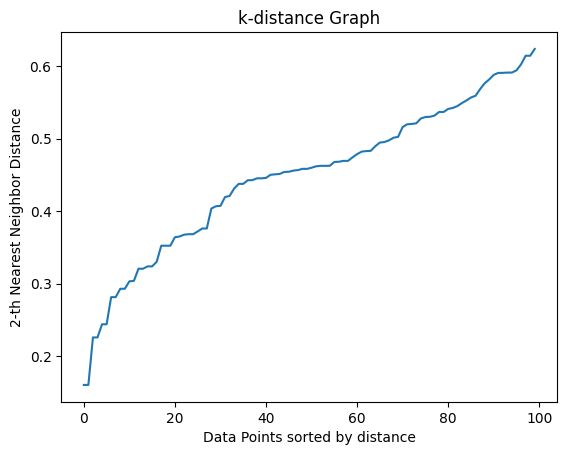

In [8]:
embeddings=np.array(embedder.embed_documents(purposes)).astype('float32')

k = 2  # Typically set k to min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(embeddings)
distances, indices = neighbors_fit.kneighbors(embeddings)
# Sort the distances (k-th nearest distances)
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('k-distance Graph')
plt.show()

In [13]:
from kneed import KneeLocator

# Use the kneedle algorithm to find the elbow point
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.knee]

print(f'Optimal eps: {optimal_eps}')

Optimal eps: 0.5943084955215454


In [32]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
labels = dbscan.fit_predict(embeddings)

for i in range(0, max(labels)):
  print(np.array(purposes)[labels == i])

['This cookie is used to distinguish between humans and bots. This is beneficial for the website, in order to make valid reports on the use of their website'
 'This cookie is used to distinguish between humans and bots']
['This cookie is set on websites using real time analytics software by Chartbeat to track website performance'
 'This cookie is set on websites using real time analytics software by Chartbeat']
['This cookie name is associated with Google Universal Analytics, according to documentation it is used to throttle the request rate - limiting the collection of data on high traffic sites. It expires after 10 minutes'
 'This cookie is set by Google Analytics.  According to their documentation it is used to throttle the request rate for the service - limiting the collection of data on high traffic sites. It expires after 10 minutes']
['This is one of the four main cookies set by the Google Analytics service which enables website owners to track visitor behaviour and measure site

In [15]:
labels

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])